In [ ]:
#Importing libraries
import numpy as np
import seaborn as sns
from sklearn import model_selection, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import torch
import re
from torch.utils.data import DataLoader
import torch.nn as nn


In [ ]:
file=files.upload()

Saving IngredientsFinal.csv to IngredientsFinal.csv


In [ ]:
ingredients=pd.read_csv('IngredientsFinal.csv')
df=pd.read_csv('RDBvF.csv')
ratings=pd.read_csv('User_DBWR.csv')

In [ ]:
allergen_keywords = {
       'Dairy': ['milk', 'Milk','cheese', 'Cheese','butter', 'yogurt', 'cream', 'lactose'],
       'Gluten': ['wheat', 'barley', 'rye', 'flour', 'bread', 'pasta'],
       'Nuts': ['almonds', 'peanuts', 'cashews', 'walnuts', 'pecans', 'hazelnuts'],
       'Shellfish': ["crab", "lobster", "shrimp", "prawn", "crayfish", "crawfish", "barnacle", "krill","clam", "mussel", "oyster", "scallop","squid", "calamari", "octopus", "cuttlefish","abalone", "conch", "snail", "escargot", "whelk", "limpet"],
       'Fish':["Salmon","Tuna","Cod","Trout","Sardines","Mackerel","Halibut","Snapper","Tilapia","Bass","Herring","Flounder",  "Walleye","Swordfish","Pollock","Anchovy","Grouper","Kingfish","Bluefish","Redfish","Carp",   "Catfish",  "Yellowtail","Barramundi", "Perch","Lingcod","Monkfish","Smelt","Eel","Tilefish"]
       # ... add more allergens and keywords
   }


allergy_dict = {
       'Dairy': 1,
       'Gluten': 2,
       'Nuts': 3,
       'Shellfish': 4,
       'Fish':5
       # ... add more allergens and keywords
   }
ingredients_list = ingredients[['Ingredients','Ingredients.1','Ingredients.2','Ingredients.3','Ingredients.4','Ingredients.5','Ingredients.6','Ingredients.7','Ingredients.8','Ingredients.9','Ingredients.10','Ingredients.11','Ingredients.12','Ingredients.13','Ingredients.14','Ingredients.15','Ingredients.16','Ingredients.17','Ingredients.18','Ingredients.19','Ingredients.20','Ingredients.21','Ingredients.22','Ingredients.23','Ingredients.24','Ingredients.25','Ingredients.26','Ingredients.27','Ingredients.28']].values  # Get the ingredients as a list

def detect_allergens(recipe_ingredients):
    detected_allergens = []
    for ingredient in recipe_ingredients:
        # Skip if ingredient is not a string (e.g., NaN)
        if not isinstance(ingredient, str):
            continue
        for allergen, keywords in allergen_keywords.items():
            if allergy_dict[allergen] not in detected_allergens:  # Check if allergen already detected in the recipe
                if any(keyword in ingredient for keyword in keywords):
                    detected_allergens.append(allergy_dict[allergen])
                    break
    if not detected_allergens:  # Check if the list is empty (no allergens found)
        return [0]  # Return [0] to indicate no allergies
    else:
        return detected_allergens

allergen_info = [detect_allergens(recipe) for recipe in ingredients_list]



In [ ]:
allergen_info

[[4, 2],
 [0],
 [2],
 [0],
 [1],
 [2, 1, 3],
 [0],
 [0],
 [0],
 [0],
 [1, 2],
 [4],
 [0],
 [0],
 [0],
 [2],
 [2],
 [1],
 [1, 2],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [2, 1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1, 2],
 [0],
 [1],
 [0],
 [1],
 [1, 2],
 [2],
 [1],
 [1, 2],
 [0],
 [1, 2],
 [1, 2],
 [2],
 [3, 1, 2],
 [1],
 [2, 1],
 [1],
 [2, 1],
 [1],
 [1],
 [1],
 [2],
 [2, 1],
 [1],
 [1],
 [0],
 [2],
 [1, 4],
 [2],
 [2],
 [2, 1],
 [0],
 [1],
 [1, 2],
 [0],
 [1],
 [1, 2],
 [0],
 [1],
 [2],
 [1],
 [2],
 [1],
 [1, 2],
 [1],
 [2],
 [2],
 [3],
 [2],
 [2, 4],
 [0],
 [4],
 [2],
 [2],
 [2, 1],
 [2, 1],
 [2, 1],
 [1, 2],
 [2, 1],
 [1],
 [2, 1],
 [0],
 [1],
 [1],
 [1],
 [1, 2],
 [1],
 [2, 1],
 [2],
 [2, 1],
 [1],
 [2],
 [1],
 [2, 1],
 [2, 1],
 [2, 1],
 [2, 1],
 [1],
 [1],
 [2],
 [2, 1],
 [4, 1],
 [2, 1],
 [2, 1],
 [1],
 [1],
 [0],
 [1, 2],
 [0],
 [4],
 [1],
 [0],
 [1],
 [1]

In [ ]:
#CONVERTING times to mins

import re
def convert_to_minutes(time_str):
    # Remove any extra spaces and convert to lowercase
    if isinstance(time_str, (int,float)):
      if np.isnan(time_str):
        return 30
      return int(time_str)

    if isinstance(time_str, str):
      time_str = time_str.lower().strip()


    days,hours, minutes = 0, 0,0
    if "day" in time_str or "days" in time_str:
        days = int(time_str.split("day")[0].strip()) if "day" in time_str else 0
        time_str = time_str.split("days")[-1].strip() if "days" in time_str else time_str.split("day")[-1].strip()
    # Check if there is "hr" or "hrs" in the string
    if "hr" in time_str or "hrs" in time_str:
        hours = int(time_str.split("hr")[0].strip()) if "hr" in time_str else int(time_str.split("hrs")[0].strip()) if "hrs" in time_str else 0
        time_str = time_str.split("hr")[-1].strip() if "hr" in time_str else time_str.split("hrs")[-1].strip() if "hrs" in time_str else time_str


    # Check if there is "min" in the string
    if "mins" in time_str:
        match = re.search(r'(\d+)\s*mins', time_str)
        if match:
            minutes = int(match.group(1))

    # Convert hours to minutes and add to total minutes
    total_minutes = (days*60*24)+(hours * 60) + minutes

    return total_minutes

# Convert all time strings to minutes
time_in_minutesTotal = [convert_to_minutes(time) for time in df['Total Time']]




In [ ]:
#Applying convert to mins
df['Total Time']=time_in_minutesTotal


In [ ]:
#Creating variable skill level
def skill_lvl(row):
  total_time = row['Total Time']
  n_ingredients = row['n_ingredients']
  n_steps = row['n_steps']

  # Initialize skill level components
  q4, q5, q6 = 0, 0, 0  # Initialize with 0

  # Check Total Time and assign q4
  if total_time in range(0, 60, 5):
      q4 = 1
  elif total_time in range(60, 300, 5):
      q4 = 2
  elif total_time in range(300, 4000, 5):
      q4 = 3

  # Check Number of Ingredients and assign q5
  if n_ingredients in range(0, 14, 1):
      q5 = 1
  elif n_ingredients in range(15, 29, 1):
      q5 = 2
  elif n_ingredients in range(30, 50, 1):
      q5 = 3

  # Check Number of Steps and assign q6
  if n_steps in range(1, 3, 1):
      q6 = 1
  elif n_steps in range(4, 10, 1):
      q6 = 2
  elif n_steps in range(11, 50, 1):
      q6 = 3

  SL=q4+q5+q6

  return SL


In [ ]:
def skill_lvl_norm(row):
  SL=row['Skill_lvl']
  if SL in range(1,4,1):
    SL=1
  if SL in range(4,7,1):
    SL=2
  if SL in range(7,10,1):
    SL=3
  return SL


In [ ]:
import random
def print_random_row(df):
  """Prints a random row from the DataFrame."""
  random_index = random.randint(0, len(df) - 1)  # Generate a random index
  random_row = df.iloc[[random_index]]  # Select the row using iloc
  print(random_row)  # Print the selected row

# Example usage:
print_random_row(df)


      Recipe_Number      Recipe_Name Cuisine Prep Time Cook Time  Total Time  \
1216           1217  Greek Salad Dip   Greek   10 mins       NaN          35   

     Servings       Yield  n_ingredients  n_steps  Calories  
1216        8  8 servings              5        1     147.0  


In [ ]:
#APPlying skill level
df['Skill_lvl']=df.apply(skill_lvl,axis=1)
df['Skill_lvl']=df.apply(skill_lvl_norm,axis=1)

In [ ]:
#PUT skill level into ratings
ratings=pd.merge(ratings,df[['Recipe_Number', 'Skill_lvl']],on='Recipe_Number')

In [ ]:
def preprocess_servings(row):
    """Preprocesses the servings string to extract the numerical value."""
    servings_str = row['Servings']  # Access the 'Servings' column of the current row

    if isinstance(servings_str, (int, float)):
        return servings_str
    if isinstance(servings_str, str):
        # Remove non-digit and non-period characters, and convert to float
        servings_str = re.sub(r"[^\d.]", "", servings_str)
        if servings_str:  # Check if there is any number after cleaning
            return float(servings_str)
        else:  # Handle cases where the string is empty or doesn't contain numbers
            return 4.0  # Or any default value you want to use
    else:
      return 4.0

In [ ]:
df=pd.read_csv('RDBvF.csv')

In [ ]:
df['Servings']=df.apply(preprocess_servings,axis=1)

In [ ]:
ratings=pd.merge(ratings,df[['Recipe_Number', 'Servings','Total Time','Skill_lvl']],on='Recipe_Number')

In [ ]:
ratings

,User_ID,Username,password,Allergies,Skill_lvl_x,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating,Servings,Total Time,Skill_lvl_y
0,1,Rachhel_tehe,a,no,2,5,4,60,2,5,4.0,50,2
1,1,Rachhel_tehe,a,no,2,10,4,90,280,5,4.0,90,1
2,1,Rachhel_tehe,a,no,2,5,4,45,125,5,4.0,45,2
3,1,Rachhel_tehe,a,no,2,4,6,30,521,1,18.0,120,2
4,1,Rachhel_tehe,a,no,2,8,8,80,63,2,2.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,Rachhel_tehe,a,no,2,5,2,90,2051,4,8.0,45,2
75,1,Rachhel_tehe,a,no,2,5,6,90,2908,4,12.0,60,2
76,1,Rachhel_tehe,a,no,2,5,6,90,705,5,50.0,80,2
77,1,Rachhel_tehe,a,no,2,5,6,90,4233,5,8.0,95,2


In [ ]:
df.head()

,Recipe_Number,Recipe_Name,Cuisine,Prep Time,Cook Time,Total Time,Servings,Yield,n_ingredients,n_steps,Calories,Skill_lvl
0,1,Blackened Shrimp Tacos,Mexican,20 mins,10 mins,30,6,12 tacos,13,4,793.0,1
1,2,Chilaquiles with Homemade Tomato Sauce,Mexican,20 mins,30 mins,50,4,NaN,18,7,816.0,2
2,3,Enchilada Sauce with Chocolate,Mexican,10 mins,30 mins,40,12,NaN,10,2,50.0,1
3,4,Tamales Rojos de Pollo (Red Chicken Tamales),Mexican,1 hr,1 hr 20 mins,275,35,35 tamales,13,7,131.0,1
4,5,Enchiladas Verdes,Mexican,30 mins,30 mins,60,9,9 enchiladas,12,8,304.0,1


In [ ]:
ratings.head()

,User_ID,Username,Skill_lvl_x,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating,Skill_lvl_y,Total Time,Servings
0,1,Rachhel_tehe,2,5,4,60,2,5,2,50 mins,4
1,1,Rachhel_tehe,2,10,4,90,280,5,1,1 hr 30 mins,4
2,1,Rachhel_tehe,2,5,4,45,125,5,1,45 mins,4
3,1,Rachhel_tehe,2,4,6,30,521,1,2,2 hrs,18
4,1,Rachhel_tehe,2,8,8,80,63,2,1,20 mins,2


In [ ]:
#This is how the data at the end will be outputed as a nice like recipe card almost

def text_rep(row):
  text_rep=f"""Title: {row['Recipe_Name']}
  Recipe Num: {row['Recipe_Number']}
  Cusine: {row['Cuisine']}
  Total time (Mins): {row['Total Time']}
  Servings: {row['Servings']}
  Skill Level; {row['Skill_lvl']}
  """
  return text_rep


def text_rep2(row):
  for i in range(['N_steps']):
    text_rep=f"""step {i+1}: {row['Recipe_Name']}"""

    return text_rep2


In [ ]:
print(df.iloc[:5001].apply(text_rep,axis=1).values[2556])

Title: Japanese Onion Soup
  Recipe Num: 2557
  Cusine: Japanese
  Total time (Mins): 1 hr
  Servings: 6.0
  Skill Level; 1
  


In [ ]:
#MODEL

class MatrixFactorization(torch.nn.Module):
  def __init__(self, n_users, n_items,n_skill_lvl,n_servings ,n_factors=5):
    super().__init__()
    self.user_factors = torch.nn.Embedding(n_users, n_factors)
    self.item_factors = torch.nn.Embedding(n_items, n_factors)
    self.skill_factors=torch.nn.Embedding(n_skill_lvl,n_factors)
    self.servings_factors=torch.nn.Embedding(n_servings,n_factors)
    # Initializations
    torch.nn.init.uniform_(self.user_factors.weight, a=0, b=0.05)
    torch.nn.init.uniform_(self.item_factors.weight, a=0, b=0.05)
    torch.nn.init.uniform_(self.skill_factors.weight, a=0, b=0.05)
    torch.nn.init.uniform_(self.servings_factors.weight, a=0, b=0.05)



  def forward(self, users, user_skill,item_skill,user_serving,item_serving, items):
    user_embeddings = self.user_factors(users)
    item_embeddings = self.item_factors(items)
    user_skill_embeddings=self.skill_factors(torch.clamp(user_skill, 0, self.skill_factors.num_embeddings - 1))
    item_skill_embeddings=self.skill_factors(torch.clamp(item_skill, 0, self.skill_factors.num_embeddings - 1))
    user_serving_embeddings=self.servings_factors(torch.clamp(user_serving, 0, self.servings_factors.num_embeddings - 1))
    item_serving_embeddings=self.servings_factors(torch.clamp(item_serving, 0, self.servings_factors.num_embeddings - 1))

    # Get embeddings for recipe and user skill levels

    self.l2_reg=0.01

    # Combine embeddings
    combined_embeddings = (user_embeddings * item_embeddings) + (user_skill_embeddings * item_skill_embeddings)+(user_serving_embeddings*item_serving_embeddings)

    # Add L2 regularization to the loss
    l2_loss = 0
    for param in self.parameters():
          l2_loss += torch.sum(param**2)

    return combined_embeddings.sum(1) + self.l2_reg * l2_loss






In [ ]:
#MODEL

class RecipeDataset:
  def __init__(self,users,items,user_skill,item_skill,user_serving,item_serving,ratings):
    self.users=torch.tensor(users,dtype=torch.int64)
    self.items=torch.tensor(items,dtype=torch.int64)
    self.ratings=torch.tensor(ratings,dtype=torch.float32)
    self.user_skill=torch.tensor(user_skill.values,dtype=torch.int64)
    self.item_skill=torch.tensor(item_skill.values,dtype=torch.int64)
    self.user_serving=torch.tensor(user_serving.values,dtype=torch.int64)
    self.item_serving=torch.tensor(item_serving.values,dtype=torch.int64)

  def __len__(self):
    return len(self.users)
  def __getitem__(self,idx):
    return self.users[idx],self.items[idx],self.ratings[idx],self.user_skill[idx],self.item_skill[idx],self.user_serving[idx],self.item_serving[idx]

In [ ]:
df.head()

,Recipe_Number,Recipe_Name,Cuisine,Prep Time,Cook Time,Total Time,Servings,Yield,n_ingredients,n_steps,Calories
0,1,Blackened Shrimp Tacos,Mexican,20 mins,10 mins,30 mins,6,12 tacos,13,4,793.0
1,2,Chilaquiles with Homemade Tomato Sauce,Mexican,20 mins,30 mins,50 mins,4,NaN,18,7,816.0
2,3,Enchilada Sauce with Chocolate,Mexican,10 mins,30 mins,40 mins,12,NaN,10,2,50.0
3,4,Tamales Rojos de Pollo (Red Chicken Tamales),Mexican,1 hr,1 hr 20 mins,4 hrs 35 mins,35,35 tamales,13,7,131.0
4,5,Enchiladas Verdes,Mexican,30 mins,30 mins,1 hr,9,9 enchiladas,12,8,304.0


In [274]:
#Training the model
def train(train_dataset, test_dataset, model, epochs=10, lr=.026, batch_size=32):
    # ... (rest of the code) ...

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        # Training
        model.train()  # Set model to training mode
        epoch_train_loss = 0.0
        for batch_idx, (users, items, ratings, user_skill, item_skill, user_serving, item_serving) in enumerate(train_loader):
            optimizer.zero_grad()
            predictions = model(users, user_skill, item_skill, user_serving, item_serving, items)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * len(users)
        train_losses.append(epoch_train_loss / len(train_loader.dataset))  # Average loss for the epoch

        # Evaluation
        model.eval()  # Set model to evaluation mode
        epoch_test_loss = 0.0
        with torch.no_grad():
            for users, items, ratings, user_skill, item_skill, user_serving, item_serving in test_loader:
                predictions = model(users, user_skill, item_skill, user_serving, item_serving, items)
                loss = criterion(predictions, ratings)
                epoch_test_loss += loss.item() * len(users)
        test_losses.append(epoch_test_loss / len(test_loader.dataset))  # Average loss for the epoch

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    return train_losses, test_losses
from sklearn.preprocessing import MinMaxScaler
def main():
    df = pd.read_csv('RDBvF.csv')
    ratings = pd.read_csv('User_DBWR.csv')
    df['Skill_lvl']=df.apply(skill_lvl,axis=1)
    df['Skill_lvl_norm']=df.apply(skill_lvl_norm,axis=1)
    df['Servings']=df.apply(preprocess_servings,axis=1)
    ratings=pd.merge(ratings,df[['Recipe_Number', 'Skill_lvl_norm','Total Time','Servings']],on='Recipe_Number')

    # Preprocessing
    # Fit LabelEncoder on the combined data to ensure consistent mapping
    all_recipe_numbers = pd.concat([ratings['Recipe_Number'], df['Recipe_Number']], ignore_index=True).astype(str).unique()
    lbl_user = preprocessing.LabelEncoder().fit(ratings['Username'].astype(str))
    lbl_skill_lvl=preprocessing.LabelEncoder().fit(df['Skill_lvl_norm'].astype(str))
    lbl_user_skill=preprocessing.LabelEncoder().fit(ratings['Skill_lvl_norm'].astype(str))
    lbl_recipe_num = preprocessing.LabelEncoder().fit(all_recipe_numbers)
    lbl_user_serving=preprocessing.LabelEncoder().fit(ratings['Desired_Servings'].astype(str))
    lbl_item_serving=preprocessing.LabelEncoder().fit(df['Servings'].astype(str))
    ratings['Username'] = lbl_user.transform(ratings['Username'].astype(str))
    ratings['Recipe_Number'] = lbl_recipe_num.transform(ratings['Recipe_Number'].astype(str))



    # ... rest of the code ...


    # Split data
    df_train, df_test = model_selection.train_test_split(ratings, test_size=0.2, random_state=42)
    return df_train, df_test, lbl_user, lbl_recipe_num, lbl_skill_lvl, lbl_user_skill,lbl_user_serving, lbl_item_serving


In [ ]:
ratings.head()

,User_ID,Username,password,Allergies,Skill_lvl,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating
0,1,Rachhel_tehe,a,no,2,5,4,60,2,5
1,1,Rachhel_tehe,a,no,2,10,4,90,280,5
2,1,Rachhel_tehe,a,no,2,5,4,45,125,5
3,1,Rachhel_tehe,a,no,2,4,6,30,521,1
4,1,Rachhel_tehe,a,no,2,8,8,80,63,2


In [ ]:
#The thing that actually recommends the recipies


def recommend_recipes(model, user_id, lbl_recipe_num,df,top_n=5):
    """Recommends top_n recipes for a given user.

    Args:
        model: The trained MatrixFactorization model.
        user_id: The ID of the user.
        lbl_recipe_num: The LabelEncoder used for recipe IDs.
        top_n: The number of recipes to recommend.

    Returns:
        A list of recommended recipe IDs.
    """

    # Get all recipe IDs
    df_train,df_test,_,_,_,_,_,_=main()
    df=pd.read_csv('RDBvF.csv')
    df['Skill_lvl']=df.apply(skill_lvl,axis=1)
    df['Skill_lvl1']=df.apply(skill_lvl_norm,axis=1)
    df['Servings']=df.apply(preprocess_servings,axis=1)


    all_recipe_ids = torch.tensor(range(model.item_factors.num_embeddings), dtype=torch.int64)
    # Predict ratings for all recipes for the given user
    user_id_tensor=min(user_id,model.user_factors.num_embeddings-1)
    user_id_tensor = torch.tensor([user_id], dtype=torch.int64)

    user_skill_level = ratings.loc[ratings['User_ID'] == user_id, 'Skill_lvl'].values[0]
    user_skill_tensor = torch.tensor([user_skill_level], dtype=torch.int64).repeat(len(all_recipe_ids))

    # Get item skill levels
    item_skill_levels = df['Skill_lvl'].values[:len(all_recipe_ids)]
    item_skill_tensor = torch.tensor(item_skill_levels, dtype=torch.int64)

    user_serving_level = ratings.loc[ratings['User_ID'] == user_id, 'Desired_Servings'].values[0]
    user_serving_tensor = torch.tensor([user_serving_level], dtype=torch.int64).repeat(len(all_recipe_ids))
    item_serving_levels = df['Servings'].values[:len(all_recipe_ids)]
    item_serving_tensor = torch.tensor(item_serving_levels, dtype=torch.int64)

    with torch.no_grad():
        predicted_ratings = model(user_id_tensor.repeat(len(all_recipe_ids)), user_skill_tensor, item_skill_tensor, user_serving_tensor, item_serving_tensor, all_recipe_ids)

    # Sort recipes by predicted rating (descending)
    _, top_indices = torch.topk(predicted_ratings, top_n)

    # Get recommended recipe IDs
    recommended_recipe_ids = all_recipe_ids[top_indices].tolist()

    # Apply textual representation

    return recommended_recipe_ids

# Example usage:
df_train, df_test, lbl_user, lbl_recipe_num, lbl_skill_lvl,lbl_user_skill,lbl_user_serving,lbl_item_serving = main()
train_ds = RecipeDataset(users=df_train['Username'].values, items=df_train['Recipe_Number'].values, ratings=df_train['User_rating'].values,user_skill=df_train['Skill_lvl'],item_skill=df_train['Skill_lvl_norm'],user_serving=df_train['Desired_Servings'],item_serving=df_train['Servings'])
test_ds = RecipeDataset(users=df_test['Username'].values, items=df_test['Recipe_Number'].values, ratings=df_test['User_rating'].values,user_skill=df_test['Skill_lvl'],item_skill=df_test['Skill_lvl_norm'],user_serving=df_test['Desired_Servings'],item_serving=df_test['Servings'])

model = MatrixFactorization(n_users=len(lbl_user.classes_), n_items=len(lbl_recipe_num.classes_), n_skill_lvl=len(lbl_skill_lvl.classes_),n_servings=len(lbl_item_serving.classes_),n_factors=15)
train(train_ds, test_ds, model)

# Get recommendations for user with ID 0
user_id = 4 # Example user ID
recommended_recipe_ids = recommend_recipes(model, user_id, lbl_recipe_num,df)

# Print recommended recipe IDs
print(f"Recommended recipe IDs for user {user_id}: {recommended_recipe_ids}")

# To get the actual recipe names, you can use lbl_recipe_num.inverse_transform:
recommended_recipe_names = df['Recipe_Name'].iloc[recommended_recipe_ids].tolist()
print(f"Recommended recipe names for user {user_id}: {recommended_recipe_names}")

Epoch 1/10, Train Loss: 5.7234, Test Loss: 1.6990
Recommended recipe IDs for user 4: [28, 1255, 2809, 18, 5557]
Recommended recipe names for user 4: ['Colorado Green Chili (Chile Verde)', 'Orzo and Tomato Salad with Feta Cheese', 'Beef and Guinness Irish Stew', 'Sweet Rice', 'Filipino Fish Stew (Paksiw na Bangus)']


In [ ]:
print(df.iloc[:5001].apply(text_rep,axis=1).values[1247])

Title: Greek Pasta Salad
  Recipe Num: 1248
  Cusine: Greek
  Total time (Mins): 3 hrs 30 mins
  Servings: 8
  Skill Level; 1
  


In [ ]:
def create_user_vector(User_DB):


    # Add skill level
    user_skill_level = User_DB['Skill_Level']
    user_total_time = User_DB['Prep_Time']
    user_servings=User_DB['Desired_Servings',4]

    # ... Add other features if needed ...
    user_vector = [user_skill_level, user_total_time, user_servings]  # Keep only skill and time

    return torch.tensor(user_vector, dtype=torch.float32)
def create_recipe_vectors(df):

    recipe_vectors = []
    df['Skill_lvl'] = df.apply(skill_lvl, axis=1)
    df['Skill_lvl'] = df.apply(skill_lvl_norm, axis=1)
    df['Total Time']=time_in_minutesTotal
    df['Servings']=df.apply(preprocess_servings,axis=1)
    # Iterate through each recipe in the DataFrame
    for index, row in df.iterrows():
        # Create a vector for the current recipe
      recipe_vector = []

        # Add skill level
      skill=float(row['Skill_lvl'])


      time=(row['Total Time'])

      servings=(row['Servings'])

      recipe_vector=[skill,time,servings]

        # Append the recipe vector to the list
      recipe_vectors.append(torch.tensor(recipe_vector, dtype=torch.float32)) #Append the tensor to the list instead of overwriting

    return torch.stack(recipe_vectors)
def calculate_similarity(user_vector,recipe_vectors):
   if not isinstance(user_vector, torch.Tensor):
    user_vector = torch.tensor(user_vector, dtype=torch.float32)



   similarities = torch.nn.functional.cosine_similarity(user_vector, recipe_vectors)
   return similarities

In [ ]:
a=create_recipe_vectors(df)

In [ ]:
a

tensor([[  2.,  30.],
        [  2.,  50.],
        [  1.,  40.],
        ...,
        [  2., 105.],
        [  1.,  75.],
        [  1.,  70.]])

In [ ]:
def recommend_recipes_new_user(User_DB, df, top_n=None):
   # Create recipe vectors
    recipe_vectors = create_recipe_vectors(df)

    # Calculate similarity between user preferences and recipe profiles
    similarities = calculate_similarity(User_DB, recipe_vectors)

    # Sort recipes by similarity (descending)
    _, top_indices = torch.topk(similarities, k=5)

    # Get recommended recipe IDs
    recommended_recipe_ids = top_indices.tolist()

    return recommended_recipe_ids

In [ ]:
def recommend_existing_user(username,q2_input,q3_input,q4_input,q5_input):


    import pandas as pd
    import torch
    from sklearn import preprocessing, model_selection
    from torch.utils.data import DataLoader
    import torch.nn as nn


    ratings = pd.read_csv('User_DBWR.csv')



    df_train, df_test, lbl_user, lbl_recipe_num, lbl_skill_lvl,lbl_user_skill,lbl_user_serving,lbl_item_serving = main()
    train_ds = RecipeDataset(users=df_train['Username'].values, items=df_train['Recipe_Number'].values, ratings=df_train['User_rating'].values,user_skill=df_train['Skill_lvl'],item_skill=df_train['Skill_lvl_norm'],user_serving=df_train['Desired_Servings'],item_serving=df_train['Servings'])
    test_ds = RecipeDataset(users=df_test['Username'].values, items=df_test['Recipe_Number'].values, ratings=df_test['User_rating'].values,user_skill=df_test['Skill_lvl'],item_skill=df_test['Skill_lvl_norm'],user_serving=df_test['Desired_Servings'],item_serving=df_test['Servings'])

    model = MatrixFactorization(n_users=len(lbl_user.classes_), n_items=len(lbl_recipe_num.classes_), n_skill_lvl=len(lbl_skill_lvl.classes_),n_servings=len(lbl_item_serving.classes_),n_factors=15)
    train(train_ds, test_ds, model)

    try:
        user_id = lbl_user.transform([username])[0]
    except ValueError:
        return f"User '{username}' not found in the dataset.", None

    recommendations_mf = recommend_recipes(model, user_id, lbl_recipe_num, df)  # Use the retrieved user ID

    user_data = [q2_input, q5_input,q4_input]
    user_db = pd.Series(user_data, index=['Skill_Level', 'Prep_Time','Desired_Servings'])
    recipe_vectors=create_recipe_vectors(df)
    recommendations_cs = recommend_recipes_new_user(user_db, df)  # Get cosine similarity recommendations
    mf_rank={rec_id:rank for rank, rec_id in enumerate(recommendations_mf,1)}
    cs_rank={rec_id:rank for rank, rec_id in enumerate(recommendations_cs,1)}
    all_recommendations = list(set(recommendations_mf + recommendations_cs))
    combined_ranks = {rec_id: mf_rank.get(rec_id, float('inf')) + cs_rank.get(rec_id, float('inf'))
                      for rec_id in all_recommendations}
    sorted_recommendations = sorted(all_recommendations, key=lambda rec_id: combined_ranks[rec_id])

    top_n = 5

    top_recommendations = all_recommendations[:top_n]

    # Update the output to include Matrix Factorization recommendations
    result = f"\nRecommendations based on your preferences:\n"
    result += "\n".join([text_rep(df.iloc[rec_idx]) for rec_idx in recommendations_mf])

    return print(result)

In [ ]:
recommend_existing_user('Rachhel_tehe',2,5,6,60)

Epoch 1/10, Train Loss: 5.6612, Test Loss: 1.5846

Recommendations based on your preferences:
Title: Andouille and Poblano Quesadillas
  Recipe Num: 1385
  Cusine: Mexican
  Total time (Mins): 40
  Servings: 4.0
  Skill Level; 1
  
Title: Pasta de Sardine
  Recipe Num: 108
  Cusine: Italian
  Total time (Mins): 35
  Servings: 4.0
  Skill Level; 1
  
Title: Railroad-Style Chai
  Recipe Num: 560
  Cusine: Indian
  Total time (Mins): 10
  Servings: 4.0
  Skill Level; 1
  
Title: Easy Black Bean Taco Salad
  Recipe Num: 2966
  Cusine: American
  Total time (Mins): 35
  Servings: 4.0
  Skill Level; 1
  
Title: South Shore Bar Pizza
  Recipe Num: 199
  Cusine: Italian
  Total time (Mins): 340
  Servings: 4.0
  Skill Level; 2
  


<ipython-input-125-314ff4a24772>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_vector = torch.tensor(user_vector, dtype=torch.float32)


In [ ]:
##Sample results for existing user model
user_vector = create_user_vector(ratings.iloc[33])

# 2. Create recipe vectors for all recipes in the DataFrame
recipe_vectors = create_recipe_vectors(df)

# 3. Calculate similarity scores between the user vector and recipe vectors
similarities = calculate_similarity(user_vector, recipe_vectors)

# 4. Get top-n recommendations using recommend_recipes_new_user
top_n = 5  # Number of recommendations to generate
recommended_recipe_ids = recommend_recipes_new_user(user_vector, recipe_vectors, top_n=top_n)

# 5. Print the recommended recipe IDs
print(f"Recommended recipe IDs for the new user: {recommended_recipe_ids}")

# 6. Get the recipe names (if needed)
recommended_recipe_names = df['Recipe_Name'].iloc[recommended_recipe_ids].tolist()
print(f"Recommended recipe names for the new user: {recommended_recipe_names}")

Recommended recipe IDs for the new user: [2336, 4444, 1071, 1073, 540]
Recommended recipe names for the new user: ['Black Bean Breakfast Tostadas', "Uncle Jesse's French Toast", 'Tzatziki Sauce', 'Saganaki (Flaming Greek Cheese)', 'Turmeric Milk']


In [ ]:
print(df.iloc[:5001].apply(text_rep,axis=1).values[2335])

Title: Breakfast Tostadas
  Recipe Num: 2336
  Cusine: Mexican
  Total time (Mins): 15 mins
  Servings: 4
  


In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:


def objective(trial):
  lr=trial.suggest_float('lr', 1e-5,1e-1,log=True)
  weight_decay=trial.suggest_float("weight_decay", 1e-5, 1e-1, log=True)
  model = MatrixFactorization(n_users=len(lbl_user.classes_), n_items=len(lbl_recipe_num.classes_),n_skill_lvl=len(lbl_skill_lvl.classes_),n_servings=len(lbl_item_serving.classes_), n_factors=15)
  test_loss = train(train_ds,test_ds, model, batch_size=16, lr=lr, epochs=20) #assign to test_loss
  return test_loss


study=optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(study.best_params)


[I 2024-12-18 16:00:59,298] A new study created in memory with name: no-name-07649159-20e8-40da-bb37-3cad30d0d131
[I 2024-12-18 16:00:59,338] Trial 0 finished with value: 9.885427474975586 and parameters: {'lr': 0.0003746053445933869, 'weight_decay': 0.09961119516722185}. Best is trial 0 with value: 9.885427474975586.
[I 2024-12-18 16:00:59,371] Trial 1 finished with value: 2.417450428009033 and parameters: {'lr': 0.011609830098992972, 'weight_decay': 2.3762901045149765e-05}. Best is trial 1 with value: 2.417450428009033.
[I 2024-12-18 16:00:59,409] Trial 2 finished with value: 9.426314353942871 and parameters: {'lr': 0.0008110173098456002, 'weight_decay': 0.004275898762911429}. Best is trial 1 with value: 2.417450428009033.
[I 2024-12-18 16:00:59,444] Trial 3 finished with value: 10.257264137268066 and parameters: {'lr': 2.43623357201153e-05, 'weight_decay': 8.830598838264139e-05}. Best is trial 1 with value: 2.417450428009033.
[I 2024-12-18 16:00:59,477] Trial 4 finished with value: 

Epoch 1/20, Train Loss: 10.0399, Test Loss: 9.8854
Epoch 1/20, Train Loss: 5.4183, Test Loss: 2.4175
Epoch 1/20, Train Loss: 9.8909, Test Loss: 9.4263
Epoch 1/20, Train Loss: 10.1602, Test Loss: 10.2573
Epoch 1/20, Train Loss: 7.7282, Test Loss: 6.6464
Epoch 1/20, Train Loss: 9.7086, Test Loss: 9.0854


[I 2024-12-18 16:00:59,560] Trial 6 finished with value: 1.8424063920974731 and parameters: {'lr': 0.02549152248624047, 'weight_decay': 0.00012292591682667002}. Best is trial 6 with value: 1.8424063920974731.
[I 2024-12-18 16:00:59,584] Trial 7 finished with value: 10.147778511047363 and parameters: {'lr': 0.00017784788730364442, 'weight_decay': 2.9046965971295004e-05}. Best is trial 6 with value: 1.8424063920974731.
[I 2024-12-18 16:00:59,608] Trial 8 finished with value: 3.032175302505493 and parameters: {'lr': 0.0065150757728909105, 'weight_decay': 0.005001476002026486}. Best is trial 6 with value: 1.8424063920974731.
[I 2024-12-18 16:00:59,635] Trial 9 finished with value: 9.381427764892578 and parameters: {'lr': 0.0008547839699337555, 'weight_decay': 0.0003238520237742898}. Best is trial 6 with value: 1.8424063920974731.
[I 2024-12-18 16:00:59,688] Trial 10 finished with value: 7.23008394241333 and parameters: {'lr': 0.09185028399205405, 'weight_decay': 0.0003208608946225937}. Bes

Epoch 1/20, Train Loss: 6.7835, Test Loss: 1.8424
Epoch 1/20, Train Loss: 10.1440, Test Loss: 10.1478
Epoch 1/20, Train Loss: 7.5674, Test Loss: 3.0322
Epoch 1/20, Train Loss: 9.8509, Test Loss: 9.3814
Epoch 1/20, Train Loss: 27.2632, Test Loss: 7.2301
Epoch 1/20, Train Loss: 6.8113, Test Loss: 1.6093


[I 2024-12-18 16:00:59,786] Trial 12 finished with value: 2.0676395893096924 and parameters: {'lr': 0.01157211130023673, 'weight_decay': 1.4357317754142997e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:00:59,827] Trial 13 finished with value: 5.5379252433776855 and parameters: {'lr': 0.00419333570669969, 'weight_decay': 0.00010710343090111894}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:00:59,862] Trial 14 finished with value: 2.73091983795166 and parameters: {'lr': 0.02317581854812532, 'weight_decay': 8.199498858897854e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:00:59,900] Trial 15 finished with value: 7.691964626312256 and parameters: {'lr': 0.002317326631937155, 'weight_decay': 0.0006826465945904653}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:00:59,945] Trial 16 finished with value: 1.6116516590118408 and parameters: {'lr': 0.027453254170499826, 'weight_decay': 1.137883826572562e-05}

Epoch 1/20, Train Loss: 5.6787, Test Loss: 2.0676
Epoch 1/20, Train Loss: 8.4119, Test Loss: 5.5379
Epoch 1/20, Train Loss: 6.0804, Test Loss: 2.7309
Epoch 1/20, Train Loss: 9.2313, Test Loss: 7.6920
Epoch 1/20, Train Loss: 5.8237, Test Loss: 1.6117
Epoch 1/20, Train Loss: 8.0409, Test Loss: 1.8486


[I 2024-12-18 16:01:00,025] Trial 18 finished with value: 10.216236114501953 and parameters: {'lr': 6.395153471388627e-05, 'weight_decay': 4.010856499159174e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,067] Trial 19 finished with value: 6.912369251251221 and parameters: {'lr': 0.002954817812896453, 'weight_decay': 0.0002762115396485955}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,112] Trial 20 finished with value: 1.9157408475875854 and parameters: {'lr': 0.011049670372173519, 'weight_decay': 4.546334143507311e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,157] Trial 21 finished with value: 2.433722496032715 and parameters: {'lr': 0.04005653060516951, 'weight_decay': 1.070659085533293e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,197] Trial 22 finished with value: 2.421306848526001 and parameters: {'lr': 0.02143045061872321, 'weight_decay': 0.0001626575799186694}

Epoch 1/20, Train Loss: 10.1362, Test Loss: 10.2162
Epoch 1/20, Train Loss: 9.0515, Test Loss: 6.9124
Epoch 1/20, Train Loss: 5.9838, Test Loss: 1.9157
Epoch 1/20, Train Loss: 12.7475, Test Loss: 2.4337
Epoch 1/20, Train Loss: 5.7614, Test Loss: 2.4213


[I 2024-12-18 16:01:00,241] Trial 23 finished with value: 7.187869071960449 and parameters: {'lr': 0.0906660410195596, 'weight_decay': 2.8822427233267365e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,278] Trial 24 finished with value: 3.300093412399292 and parameters: {'lr': 0.006266455317910597, 'weight_decay': 5.747810835398125e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,320] Trial 25 finished with value: 2.6362457275390625 and parameters: {'lr': 0.014233342424373756, 'weight_decay': 0.0010309576657413398}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,359] Trial 26 finished with value: 2.3194594383239746 and parameters: {'lr': 0.04034579732914928, 'weight_decay': 2.1359080619157434e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,394] Trial 27 finished with value: 8.091800689697266 and parameters: {'lr': 0.0019566996207503427, 'weight_decay': 0.0001644825913682280

Epoch 1/20, Train Loss: 24.4815, Test Loss: 7.1879
Epoch 1/20, Train Loss: 7.8934, Test Loss: 3.3001
Epoch 1/20, Train Loss: 6.4415, Test Loss: 2.6362
Epoch 1/20, Train Loss: 5.0575, Test Loss: 2.3195
Epoch 1/20, Train Loss: 9.3915, Test Loss: 8.0918
Epoch 1/20, Train Loss: 8.1564, Test Loss: 4.7125


[I 2024-12-18 16:01:00,476] Trial 29 finished with value: 9.931192398071289 and parameters: {'lr': 0.000344409742999111, 'weight_decay': 0.054134504257302804}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,512] Trial 30 finished with value: 3.157935857772827 and parameters: {'lr': 0.020173022559149646, 'weight_decay': 0.0012415473360731866}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,550] Trial 31 finished with value: 2.8469409942626953 and parameters: {'lr': 0.04908958640253657, 'weight_decay': 1.0002131573543239e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,592] Trial 32 finished with value: 1.7452324628829956 and parameters: {'lr': 0.029898889344597113, 'weight_decay': 1.9988618874972027e-05}. Best is trial 11 with value: 1.6093144416809082.
[I 2024-12-18 16:01:00,631] Trial 33 finished with value: 1.6181176900863647 and parameters: {'lr': 0.009145062133522537, 'weight_decay': 5.348994372834855e-0

Epoch 1/20, Train Loss: 10.0441, Test Loss: 9.9312
Epoch 1/20, Train Loss: 5.0764, Test Loss: 3.1579
Epoch 1/20, Train Loss: 5.4369, Test Loss: 2.8469
Epoch 1/20, Train Loss: 6.0589, Test Loss: 1.7452
Epoch 1/20, Train Loss: 6.4970, Test Loss: 1.6181
Epoch 1/20, Train Loss: 6.4211, Test Loss: 1.5920


[I 2024-12-18 16:01:00,735] Trial 35 finished with value: 1.7546274662017822 and parameters: {'lr': 0.008630879247295112, 'weight_decay': 6.343004376558822e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:00,780] Trial 36 finished with value: 8.982450485229492 and parameters: {'lr': 0.001217678756472306, 'weight_decay': 3.4994476717192364e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:00,829] Trial 37 finished with value: 5.453214168548584 and parameters: {'lr': 0.004215767897479725, 'weight_decay': 5.335283758209203e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:00,877] Trial 38 finished with value: 9.914897918701172 and parameters: {'lr': 0.0003599207724559113, 'weight_decay': 2.2019056353297415e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:00,916] Trial 39 finished with value: 3.1006927490234375 and parameters: {'lr': 0.0140905976607175, 'weight_decay': 0.000195248525545470

Epoch 1/20, Train Loss: 6.6316, Test Loss: 1.7546
Epoch 1/20, Train Loss: 9.7456, Test Loss: 8.9825
Epoch 1/20, Train Loss: 8.5422, Test Loss: 5.4532
Epoch 1/20, Train Loss: 10.0351, Test Loss: 9.9149
Epoch 1/20, Train Loss: 5.8851, Test Loss: 3.1007


[I 2024-12-18 16:01:00,956] Trial 40 finished with value: 10.295971870422363 and parameters: {'lr': 1.6202163375049215e-05, 'weight_decay': 0.015462609188269407}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:00,994] Trial 41 finished with value: 3.620918035507202 and parameters: {'lr': 0.016933335896881972, 'weight_decay': 2.0722983538981957e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:01,036] Trial 42 finished with value: 8.548097610473633 and parameters: {'lr': 0.06639579814278104, 'weight_decay': 1.6110881372184817e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:01,072] Trial 43 finished with value: 2.3916730880737305 and parameters: {'lr': 0.007498340115935171, 'weight_decay': 3.212937761872988e-05}. Best is trial 34 with value: 1.5920426845550537.
[I 2024-12-18 16:01:01,114] Trial 44 finished with value: 1.5814714431762695 and parameters: {'lr': 0.026786888894003963, 'weight_decay': 7.886596772214342e

Epoch 1/20, Train Loss: 10.1827, Test Loss: 10.2960
Epoch 1/20, Train Loss: 5.8836, Test Loss: 3.6209
Epoch 1/20, Train Loss: 9.5715, Test Loss: 8.5481
Epoch 1/20, Train Loss: 7.4935, Test Loss: 2.3917
Epoch 1/20, Train Loss: 6.6943, Test Loss: 1.5815
Epoch 1/20, Train Loss: 5.9355, Test Loss: 1.6259


[I 2024-12-18 16:01:01,188] Trial 46 finished with value: 2.514714002609253 and parameters: {'lr': 0.05512650896807165, 'weight_decay': 0.0005835240866839542}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,223] Trial 47 finished with value: 8.576067924499512 and parameters: {'lr': 0.0015335907322930494, 'weight_decay': 0.00011023575244729068}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,263] Trial 48 finished with value: 6.98268985748291 and parameters: {'lr': 0.002899820261247389, 'weight_decay': 6.319385353773907e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,297] Trial 49 finished with value: 1.6547642946243286 and parameters: {'lr': 0.02596230029454845, 'weight_decay': 0.0016541699385033996}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,331] Trial 50 finished with value: 9.563665390014648 and parameters: {'lr': 0.0006861019858910383, 'weight_decay': 0.0005351232829960321}

Epoch 1/20, Train Loss: 4.9912, Test Loss: 2.5147
Epoch 1/20, Train Loss: 9.5498, Test Loss: 8.5761
Epoch 1/20, Train Loss: 8.9590, Test Loss: 6.9827
Epoch 1/20, Train Loss: 5.3174, Test Loss: 1.6548
Epoch 1/20, Train Loss: 9.9250, Test Loss: 9.5637
Epoch 1/20, Train Loss: 6.3445, Test Loss: 1.7797


[I 2024-12-18 16:01:01,402] Trial 52 finished with value: 2.3152596950531006 and parameters: {'lr': 0.011827176955096453, 'weight_decay': 3.3505336960531436e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,440] Trial 53 finished with value: 3.7790298461914062 and parameters: {'lr': 0.005746918522174732, 'weight_decay': 1.4891865279599748e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,477] Trial 54 finished with value: 6.5219526290893555 and parameters: {'lr': 0.003308386666311622, 'weight_decay': 0.00022172498517460454}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,513] Trial 55 finished with value: 1.6234809160232544 and parameters: {'lr': 0.00916053648752504, 'weight_decay': 0.00012240565807737072}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,560] Trial 56 finished with value: 10.241235733032227 and parameters: {'lr': 8.231223958170468e-05, 'weight_decay': 4.704497882596

Epoch 1/20, Train Loss: 5.6140, Test Loss: 2.3153
Epoch 1/20, Train Loss: 7.5363, Test Loss: 3.7790
Epoch 1/20, Train Loss: 8.9363, Test Loss: 6.5220
Epoch 1/20, Train Loss: 6.1178, Test Loss: 1.6235
Epoch 1/20, Train Loss: 10.1696, Test Loss: 10.2412


[I 2024-12-18 16:01:01,610] Trial 57 finished with value: 3.709545135498047 and parameters: {'lr': 0.018876019272233188, 'weight_decay': 0.0001330525317859047}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,658] Trial 58 finished with value: 2.4992785453796387 and parameters: {'lr': 0.03466786400438655, 'weight_decay': 2.6810780340884587e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,705] Trial 59 finished with value: 10.019020080566406 and parameters: {'lr': 0.07980351542217973, 'weight_decay': 7.46312143660717e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,766] Trial 60 finished with value: 3.5370841026306152 and parameters: {'lr': 0.016122400622074897, 'weight_decay': 0.0004021407177612155}. Best is trial 44 with value: 1.5814714431762695.


Epoch 1/20, Train Loss: 5.3732, Test Loss: 3.7095
Epoch 1/20, Train Loss: 7.9569, Test Loss: 2.4993
Epoch 1/20, Train Loss: 18.2776, Test Loss: 10.0190
Epoch 1/20, Train Loss: 5.6254, Test Loss: 3.5371


[I 2024-12-18 16:01:01,818] Trial 61 finished with value: 1.5912196636199951 and parameters: {'lr': 0.009985569568015063, 'weight_decay': 0.00011729497721046005}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,876] Trial 62 finished with value: 3.7326297760009766 and parameters: {'lr': 0.005851761545682141, 'weight_decay': 1.3215929312794493e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,931] Trial 63 finished with value: 2.2254574298858643 and parameters: {'lr': 0.01145194627823145, 'weight_decay': 4.2542309328208874e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:01,979] Trial 64 finished with value: 1.6895718574523926 and parameters: {'lr': 0.02508327986377097, 'weight_decay': 0.00012974551412349019}. Best is trial 44 with value: 1.5814714431762695.


Epoch 1/20, Train Loss: 6.3346, Test Loss: 1.5912
Epoch 1/20, Train Loss: 8.1304, Test Loss: 3.7326
Epoch 1/20, Train Loss: 5.0694, Test Loss: 2.2255
Epoch 1/20, Train Loss: 6.4304, Test Loss: 1.6896


[I 2024-12-18 16:01:02,022] Trial 65 finished with value: 2.9120278358459473 and parameters: {'lr': 0.04413492698553611, 'weight_decay': 0.00026908193851002984}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,063] Trial 66 finished with value: 2.4834465980529785 and parameters: {'lr': 0.00720758293563884, 'weight_decay': 2.58340103502598e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,104] Trial 67 finished with value: 5.282249450683594 and parameters: {'lr': 0.004350051921203455, 'weight_decay': 9.466107808309752e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,147] Trial 68 finished with value: 2.9196043014526367 and parameters: {'lr': 0.013666770725714174, 'weight_decay': 4.2886500259622615e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,182] Trial 69 finished with value: 3.1050376892089844 and parameters: {'lr': 0.020239474678940314, 'weight_decay': 1.2747664848064752e-

Epoch 1/20, Train Loss: 4.6544, Test Loss: 2.9120
Epoch 1/20, Train Loss: 7.2298, Test Loss: 2.4834
Epoch 1/20, Train Loss: 8.2962, Test Loss: 5.2822
Epoch 1/20, Train Loss: 5.9184, Test Loss: 2.9196
Epoch 1/20, Train Loss: 6.0593, Test Loss: 3.1050


[I 2024-12-18 16:01:02,229] Trial 70 finished with value: 8.020980834960938 and parameters: {'lr': 0.002037889501188066, 'weight_decay': 0.00016994035686866381}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,267] Trial 71 finished with value: 1.6298586130142212 and parameters: {'lr': 0.009114380648137991, 'weight_decay': 6.060469288991079e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,304] Trial 72 finished with value: 1.6030986309051514 and parameters: {'lr': 0.00993988068053133, 'weight_decay': 7.882629506374332e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,341] Trial 73 finished with value: 1.9539620876312256 and parameters: {'lr': 0.03173659643294209, 'weight_decay': 7.563218856147162e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,379] Trial 74 finished with value: 6.436242580413818 and parameters: {'lr': 0.0033847580619208078, 'weight_decay': 0.000118520275657536

Epoch 1/20, Train Loss: 9.3726, Test Loss: 8.0210
Epoch 1/20, Train Loss: 6.4288, Test Loss: 1.6299
Epoch 1/20, Train Loss: 6.2750, Test Loss: 1.6031
Epoch 1/20, Train Loss: 6.7438, Test Loss: 1.9540
Epoch 1/20, Train Loss: 8.7819, Test Loss: 6.4362
Epoch 1/20, Train Loss: 8.0520, Test Loss: 3.9452


[I 2024-12-18 16:01:02,452] Trial 76 finished with value: 2.775902032852173 and parameters: {'lr': 0.015734368646612294, 'weight_decay': 3.69534722793419e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,488] Trial 77 finished with value: 2.3438327312469482 and parameters: {'lr': 0.007484504226728571, 'weight_decay': 0.00023219501876678634}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,530] Trial 78 finished with value: 2.0136454105377197 and parameters: {'lr': 0.011622288604885603, 'weight_decay': 1.8678769397185316e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,568] Trial 79 finished with value: 1.6356651782989502 and parameters: {'lr': 0.02539227862261877, 'weight_decay': 5.388907762899393e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,604] Trial 80 finished with value: 7.447720050811768 and parameters: {'lr': 0.002539269375293423, 'weight_decay': 2.650654021734874e-0

Epoch 1/20, Train Loss: 6.5245, Test Loss: 2.7759
Epoch 1/20, Train Loss: 6.9639, Test Loss: 2.3438
Epoch 1/20, Train Loss: 5.9401, Test Loss: 2.0136
Epoch 1/20, Train Loss: 5.5210, Test Loss: 1.6357
Epoch 1/20, Train Loss: 9.2126, Test Loss: 7.4477
Epoch 1/20, Train Loss: 6.5609, Test Loss: 1.7220


[I 2024-12-18 16:01:02,683] Trial 82 finished with value: 1.601086139678955 and parameters: {'lr': 0.009861997099789497, 'weight_decay': 0.00015665206913642498}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,728] Trial 83 finished with value: 5.528975486755371 and parameters: {'lr': 0.0041651880883030075, 'weight_decay': 0.00014641535425945491}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,794] Trial 84 finished with value: 2.5455586910247803 and parameters: {'lr': 0.013128209713888887, 'weight_decay': 6.437627193608203e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,852] Trial 85 finished with value: 1.5891634225845337 and parameters: {'lr': 0.009707708262388278, 'weight_decay': 0.005988496092897863}. Best is trial 44 with value: 1.5814714431762695.


Epoch 1/20, Train Loss: 6.2042, Test Loss: 1.6011
Epoch 1/20, Train Loss: 8.6310, Test Loss: 5.5290
Epoch 1/20, Train Loss: 6.2340, Test Loss: 2.5456
Epoch 1/20, Train Loss: 5.9736, Test Loss: 1.5892


[I 2024-12-18 16:01:02,896] Trial 86 finished with value: 2.9912118911743164 and parameters: {'lr': 0.01970677214806399, 'weight_decay': 0.004515541404713203}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,932] Trial 87 finished with value: 2.327198028564453 and parameters: {'lr': 0.03731233042581391, 'weight_decay': 1.0083654658095095e-05}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:02,967] Trial 88 finished with value: 4.227049827575684 and parameters: {'lr': 0.005298579653223954, 'weight_decay': 0.003488997473965765}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,006] Trial 89 finished with value: 8.197261810302734 and parameters: {'lr': 0.06479596864142964, 'weight_decay': 0.009003392877959813}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,042] Trial 90 finished with value: 4.782356262207031 and parameters: {'lr': 0.016979661488558857, 'weight_decay': 0.0019964702277545307}. Bes

Epoch 1/20, Train Loss: 6.3952, Test Loss: 2.9912
Epoch 1/20, Train Loss: 5.1763, Test Loss: 2.3272
Epoch 1/20, Train Loss: 7.9269, Test Loss: 4.2270
Epoch 1/20, Train Loss: 10.1288, Test Loss: 8.1973
Epoch 1/20, Train Loss: 4.8094, Test Loss: 4.7824
Epoch 1/20, Train Loss: 6.3851, Test Loss: 1.5958


[I 2024-12-18 16:01:03,120] Trial 92 finished with value: 2.812653064727783 and parameters: {'lr': 0.006852568877702756, 'weight_decay': 0.008700421663099393}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,156] Trial 93 finished with value: 1.738236904144287 and parameters: {'lr': 0.010541360939618266, 'weight_decay': 0.0008325973767071808}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,192] Trial 94 finished with value: 1.6979708671569824 and parameters: {'lr': 0.02950730525060537, 'weight_decay': 0.010408087111125133}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,228] Trial 95 finished with value: 9.745198249816895 and parameters: {'lr': 0.00051283908629039, 'weight_decay': 0.04423035916760357}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,263] Trial 96 finished with value: 2.5854921340942383 and parameters: {'lr': 0.014016272236788344, 'weight_decay': 0.0061047365762481095}. Bes

Epoch 1/20, Train Loss: 7.5459, Test Loss: 2.8127
Epoch 1/20, Train Loss: 5.9811, Test Loss: 1.7382
Epoch 1/20, Train Loss: 6.2994, Test Loss: 1.6980
Epoch 1/20, Train Loss: 9.9735, Test Loss: 9.7452
Epoch 1/20, Train Loss: 6.3516, Test Loss: 2.5855
Epoch 1/20, Train Loss: 7.3916, Test Loss: 2.6464


[I 2024-12-18 16:01:03,341] Trial 98 finished with value: 3.8919029235839844 and parameters: {'lr': 0.022644069657264693, 'weight_decay': 0.02095629581783217}. Best is trial 44 with value: 1.5814714431762695.
[I 2024-12-18 16:01:03,377] Trial 99 finished with value: 4.729324817657471 and parameters: {'lr': 0.004793471350176453, 'weight_decay': 0.03165287372299724}. Best is trial 44 with value: 1.5814714431762695.


Epoch 1/20, Train Loss: 7.0097, Test Loss: 3.8919
Epoch 1/20, Train Loss: 8.2311, Test Loss: 4.7293
{'lr': 0.026786888894003963, 'weight_decay': 7.886596772214342e-05}


Epoch 1/10, Train Loss: 1.5988, Test Loss: 1.5646
Epoch 2/10, Train Loss: 0.2326, Test Loss: 2.5483
Epoch 3/10, Train Loss: 0.4752, Test Loss: 1.6487
Epoch 4/10, Train Loss: 0.6366, Test Loss: 1.6380
Epoch 5/10, Train Loss: 0.1945, Test Loss: 2.2447
Epoch 6/10, Train Loss: 0.5089, Test Loss: 1.9651
Epoch 7/10, Train Loss: 0.1422, Test Loss: 1.7590
Epoch 8/10, Train Loss: 0.3150, Test Loss: 1.6786
Epoch 9/10, Train Loss: 0.1004, Test Loss: 1.9790
Epoch 10/10, Train Loss: 0.2129, Test Loss: 1.8428


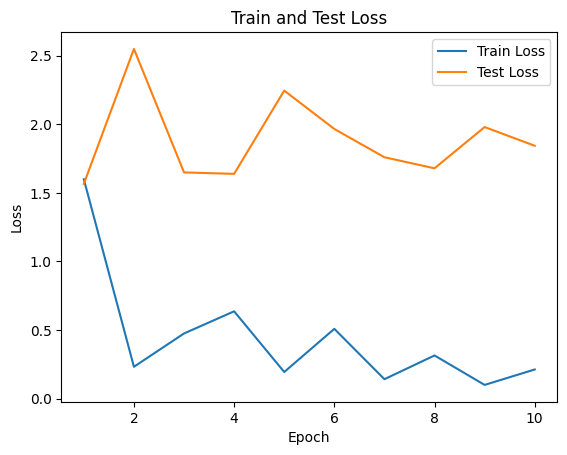

In [275]:
train_losses, test_losses = train(train_ds, test_ds, model) # updated this line to match new return values
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

In [ ]:
ratings.drop(columns=['Allergies'])

,User_ID,Username,Skill_lvl,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating
0,1,Rachhel_tehe,2,5,4,60,2,5
1,1,Rachhel_tehe,2,10,4,90,280,5
2,1,Rachhel_tehe,2,5,4,45,125,5
3,1,Rachhel_tehe,2,4,6,30,521,1
4,1,Rachhel_tehe,2,8,8,80,63,2
...,...,...,...,...,...,...,...,...
74,1,Rachhel_tehe,2,5,2,90,2051,4
75,1,Rachhel_tehe,2,5,6,90,2908,4
76,1,Rachhel_tehe,2,5,6,90,705,5
77,1,Rachhel_tehe,2,5,6,90,4233,5


In [ ]:
ratings

,User_ID,Username,password,Allergies,Skill_lvl,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating
0,1,Rachhel_tehe,a,no,2,5,4,60,2,5
1,1,Rachhel_tehe,a,no,2,10,4,90,280,5
2,1,Rachhel_tehe,a,no,2,5,4,45,125,5
3,1,Rachhel_tehe,a,no,2,4,6,30,521,1
4,1,Rachhel_tehe,a,no,2,8,8,80,63,2
...,...,...,...,...,...,...,...,...,...,...
74,1,Rachhel_tehe,a,no,2,5,2,90,2051,4
75,1,Rachhel_tehe,a,no,2,5,6,90,2908,4
76,1,Rachhel_tehe,a,no,2,5,6,90,705,5
77,1,Rachhel_tehe,a,no,2,5,6,90,4233,5


In [ ]:
from datetime import time
def augment_ratings_data(ratings, df, num_augmentations=1000):
    """Augments the ratings dataset to emphasize serving size and prep time."""
    global skill_lvl, skill_lvl_norm, time_in_minutesTotal, preprocess_servings
    augmented_ratings = []
    ratings = pd.read_csv('User_DBWR.csv')
    ratings=ratings.drop(columns=['Allergies','password'])
    df=pd.read_csv('RDBvF.csv')
    df['Skill_lvl']=df.apply(skill_lvl,axis=1)
    df['Skill_lvl_norm']=df.apply(skill_lvl_norm,axis=1)
    df['Total Time'] = time_in_minutesTotal
    df['Servings']=df.apply(preprocess_servings,axis=1)
    ratings=pd.merge(ratings,df[['Recipe_Number', 'Skill_lvl_norm','Total Time','Servings']],on='Recipe_Number')
    recipe_vector=create_recipe_vectors(df)

    for _ in range(num_augmentations):
        # Randomly select a recipe
        recipe_row = df.sample(1).iloc[0]
        recipe_number = recipe_row['Recipe_Number']
        skill_lvled = recipe_row['Skill_lvl_norm']  # Get the skill level of the recipe
        total_time = recipe_row['Total Time']
        servings = recipe_row['Servings']

        # Generate a synthetic user with matching preferences
        username = f"synthetic_user_{_}"
        user_id = ratings['User_ID'].max() + 1
        user_rating = 5  # High rating for matching preferences
        desired_time_variation = random.randint(-30, 30)  # Vary by +/- 30 minutes
        desired_time = total_time + desired_time_variation
        number_of_recipes=5
        servings_variation = random.randint(-2, 2)
        desired_servings = servings + servings_variation

        desired_servings = max(1, desired_servings)

        # Introduce variability in skill level
        skill_variation = random.randint(-1, 1)  # Vary by +/- 1 skill level
        skill = skill_lvled + skill_variation
        skill = max(1, min(3, skill))


        recipe_index = df.index[df['Recipe_Number'] == recipe_number].tolist()[0]
        selected_recipe_vector = recipe_vector[recipe_index]

        similarity_score = calculate_similarity(
            [skill, desired_time, desired_servings], selected_recipe_vector.unsqueeze(0) # User preferences, unsqueeze to add a dimension
        ).item()


        # Map similarity score to a rating range
        if similarity_score >= 0.9:
            user_rating = random.randint(4, 5)  # High similarity -> high rating (4 or 5)
        elif similarity_score >= 0.7:
            user_rating = random.randint(3, 5)  # Moderate similarity -> moderate to high rating (3, 4, or 5)
        else:
            user_rating = random.randint(1, 3)



        # Append the augmented rating to the list
        augmented_ratings.append([user_id,username,skill, number_of_recipes,desired_servings, desired_time,recipe_number,user_rating,servings,total_time,skill_lvled])

    # Create a DataFrame from the augmented ratings
    augmented_df = pd.DataFrame(augmented_ratings, columns=ratings.columns)

    # Concatenate the original and augmented DataFrames
    final_ratings_df = pd.concat([ratings, augmented_df], ignore_index=True)

    return final_ratings_df

# Example usage:
ratings = pd.read_csv('User_DBWR.csv')
df = pd.read_csv('RDBvF.csv')

# Preprocess df for skill level and total time
df['Skill_lvl'] = df.apply(skill_lvl, axis=1)
df['Skill_lvl'] = df.apply(skill_lvl_norm, axis=1)
df['Total Time'] = time_in_minutesTotal  # Assuming time_in_minutesTotal is defined
df['Servings'] = df.apply(preprocess_servings, axis=1)  # Assuming preprocess_servings is defined

augmented_ratings = augment_ratings_data(ratings, df, num_augmentations=1000)

# Save the augmented ratings DataFrame (optional)
augmented_ratings.to_csv('augmented_ratings.csv', index=False)

In [ ]:
augmented_ratings

,User_ID,Username,Skill_lvl,Number_of_Recipes,Desired_Servings,Desired_Time,Recipe_Number,User_rating,Skill_lvl_norm,Total Time,Servings
0,1,Rachhel_tehe,2,5,4.0,60,2,5,2.0,50,4.0
1,1,Rachhel_tehe,2,10,4.0,90,280,5,1.0,90,4.0
2,1,Rachhel_tehe,2,5,4.0,45,125,5,1.0,45,4.0
3,1,Rachhel_tehe,2,4,6.0,30,521,1,2.0,120,18.0
4,1,Rachhel_tehe,2,8,8.0,80,63,2,1.0,20,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1074,7,synthetic_user_995,1,5,1.0,-24,2254,2,1.0,5,1.0
1075,7,synthetic_user_996,2,5,11.0,106,4112,4,12.0,80,1.0
1076,7,synthetic_user_997,2,5,13.0,21,1584,4,12.0,35,1.0
1077,7,synthetic_user_998,1,5,9.0,22,1217,5,8.0,35,1.0


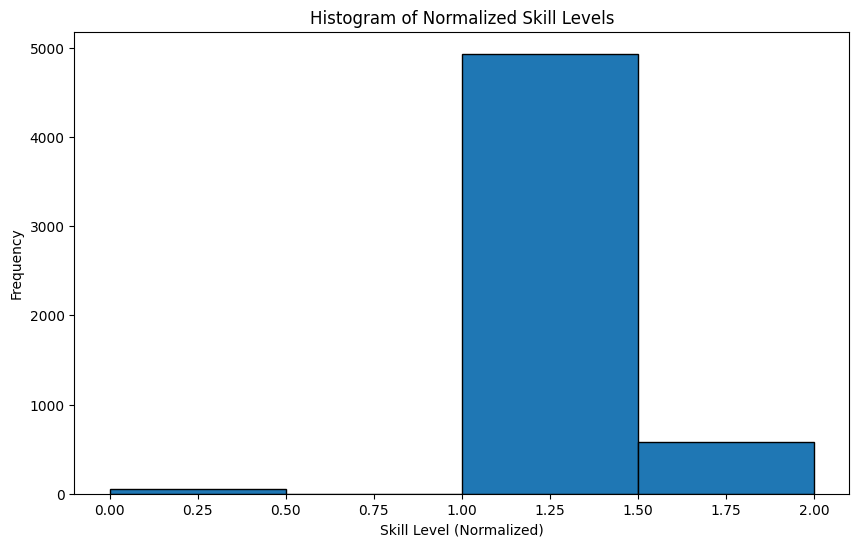

In [ ]:
# prompt: make a histogram of skill_lvl_norm

import matplotlib.pyplot as plt
df = pd.read_csv('RDBvF.csv')
df['Skill_lvl']=df.apply(skill_lvl,axis=1)
df['Skill_lvl_norm']=df.apply(skill_lvl_norm,axis=1)
# Assuming 'df' is your DataFrame and 'skill_lvl_norm' is the column you want to plot.
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(df['Skill_lvl_norm'], bins=4, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Skill Level (Normalized)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Skill Levels')
plt.show()

In [291]:
def train_augmented(augmented_ratings, df, model, epochs=10, lr=.026, batch_size=16):
    """
    Trains the MatrixFactorization model using augmented ratings data.

    Args:
        augmented_ratings: DataFrame containing augmented ratings.
        df: DataFrame containing recipe information.
        model: The MatrixFactorization model.
        epochs: Number of training epochs.
        lr: Learning rate.
        batch_size: Batch size for training.

    Returns:
        train_losses: List of training losses per epoch.
        test_losses: List of test losses per epoch.
    """


    # Create data loaders
    train_loader_aug = DataLoader(train_ds_aug, batch_size=batch_size, shuffle=True)
    test_loader_aug = DataLoader(test_ds_aug, batch_size=batch_size, shuffle=False)

    # ... (rest of the training code is similar to the original 'train' function,
    # but uses train_loader_aug and test_loader_aug)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        # Training
        model.train()
        epoch_train_loss = 0.0
        for batch_idx, (users, items, ratings, user_skill, item_skill, user_serving, item_serving) in enumerate(train_loader_aug):
            optimizer.zero_grad()
            predictions = model(users, user_skill, item_skill, user_serving, item_serving, items)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * len(users)
        train_losses.append(epoch_train_loss / len(train_loader_aug.dataset))  # Average loss for the epoch

        # Evaluation
        model.eval()
        epoch_test_loss = 0.0
        with torch.no_grad():
            for users, items, ratings, user_skill, item_skill, user_serving, item_serving in test_loader_aug:
                predictions = model(users, user_skill, item_skill, user_serving, item_serving, items)
                loss = criterion(predictions, ratings)
                epoch_test_loss += loss.item() * len(users)  # Accumulate test loss for the epoch
        test_losses.append(epoch_test_loss / len(test_loader_aug.dataset))  # Average loss for the epoch
    return train_losses, test_losses  # Return both train and test losses

def main_augmented():
        # Preprocessing for augmented data
        lbl_user_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Username'].astype(str))
        lbl_recipe_num_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Recipe_Number'].astype(str))
        # ... (similarly for skill level and servings)
        lbl_skill_lvl_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Skill_lvl'].astype(str))  # Fit LabelEncoder for skill level
        lbl_user_skill_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Skill_lvl_norm'].astype(str))  # Fit LabelEncoder for user skill level
        lbl_user_serving_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Desired_Servings'].astype(str))  # Fit LabelEncoder for user serving
        lbl_item_serving_aug = preprocessing.LabelEncoder().fit(augmented_ratings['Servings'].astype(str))  # Fit LabelEncoder for item serving


        augmented_ratings['Username'] = lbl_user_aug.transform(augmented_ratings['Username'].astype(str))
        augmented_ratings['Recipe_Number'] = lbl_recipe_num_aug.transform(augmented_ratings['Recipe_Number'].astype(str))
        # ... (transform other features)
        augmented_ratings['Skill_lvl'] = lbl_skill_lvl_aug.transform(augmented_ratings['Skill_lvl'].astype(str))  # Transform skill level
        augmented_ratings['Skill_lvl_norm'] = lbl_user_skill_aug.transform(augmented_ratings['Skill_lvl_norm'].astype(str))  # Transform user skill level
        augmented_ratings['Desired_Servings'] = lbl_user_serving_aug.transform(augmented_ratings['Desired_Servings'].astype(str))  # Transform user serving
        augmented_ratings['Servings'] = lbl_item_serving_aug.transform(augmented_ratings['Servings'].astype(str))  # Transform item serving

        # Split augmented data
        df_train_aug, df_test_aug = model_selection.train_test_split(augmented_ratings, test_size=0.2, random_state=42)
        return df_train_aug, df_test_aug, lbl_user_aug, lbl_recipe_num_aug, lbl_skill_lvl_aug, lbl_user_skill_aug, lbl_user_serving_aug, lbl_item_serving_aug
        # Create augmented datasets


In [292]:
 train_ds_aug = RecipeDataset(
        users=df_train_aug['Username'].values,
        items=df_train_aug['Recipe_Number'].values,
        ratings=df_train_aug['User_rating'].values,
        user_skill=df_train_aug['Skill_lvl'],
        item_skill=df_train_aug['Skill_lvl_norm'],
        user_serving=df_train_aug['Desired_Servings'],
        item_serving=df_train_aug['Servings']
    )
test_ds_aug = RecipeDataset(
        users=df_test_aug['Username'].values,
        items=df_test_aug['Recipe_Number'].values,
        ratings=df_test_aug['User_rating'].values,
        user_skill=df_test_aug['Skill_lvl'],
        item_skill=df_test_aug['Skill_lvl_norm'],
        user_serving=df_test_aug['Desired_Servings'],
        item_serving=df_test_aug['Servings']
    )
df_train_aug,df_test_aug,lbl_user_aug, lbl_recipe_num_aug, lbl_skill_lvl_aug, lbl_user_skill_aug, lbl_user_serving_aug, lbl_item_serving_aug = main_augmented()
model_augmented = MatrixFactorization(n_users=len(lbl_user_aug.classes_), n_items=len(lbl_recipe_num_aug.classes_), n_skill_lvl=len(lbl_skill_lvl_aug.classes_), n_servings=len(lbl_item_serving_aug.classes_), n_factors=15)  # Initialize a new model
train_losses_aug, test_losses_aug = train_augmented(augmented_ratings, df, model_augmented)

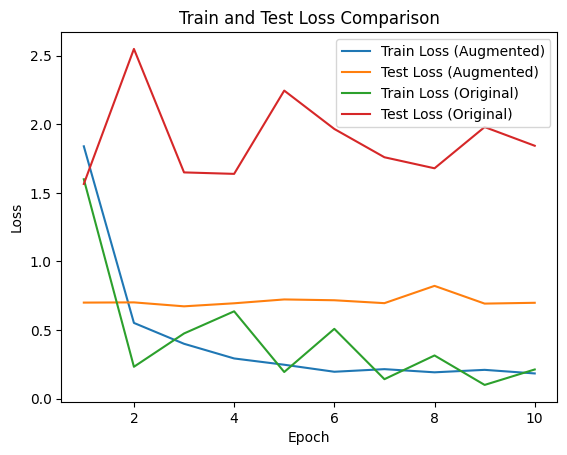

In [293]:
   epochs = range(1, len(train_losses_aug) + 1)

   plt.plot(epochs, train_losses_aug, label='Train Loss (Augmented)')
   plt.plot(epochs, test_losses_aug, label='Test Loss (Augmented)')
   plt.plot(epochs, train_losses, label='Train Loss (Original)')
   plt.plot(epochs, test_losses, label='Test Loss (Original)')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.title('Train and Test Loss Comparison')
   plt.legend()
   plt.show()

As we can see here after improving the ratings dataset it did imrpve the test adn train loss. Wile the test loss definilatly seems to stagnante it is no longer flutating which is really good

In [296]:
def recommend_recipes_augmented(model, user_id, lbl_recipe_num_aug, df, augmented_ratings, top_n=5):
    """Recommends top_n recipes for a given user using augmented data."""

    all_recipe_ids = torch.tensor(range(model.item_factors.num_embeddings), dtype=torch.int64)

    user_id_tensor = torch.tensor([user_id], dtype=torch.int64)
    # Get user preferences from augmented ratings
    user_skill_level = augmented_ratings.loc[augmented_ratings['User_ID'] == user_id, 'Skill_lvl'].values[0]
    user_skill_tensor = torch.tensor([user_skill_level], dtype=torch.int64).repeat(len(all_recipe_ids))
    user_serving_level = augmented_ratings.loc[augmented_ratings['User_ID'] == user_id, 'Desired_Servings'].values[0]
    user_serving_tensor = torch.tensor([user_serving_level], dtype=torch.int64).repeat(len(all_recipe_ids))

    # Get item skill levels and serving sizes from the original DataFrame (df)
    item_skill_levels = df['Skill_lvl'].values[:len(all_recipe_ids)]
    item_skill_tensor = torch.tensor(item_skill_levels, dtype=torch.int64)
    item_serving_levels = df['Servings'].values[:len(all_recipe_ids)]
    item_serving_tensor = torch.tensor(item_serving_levels, dtype=torch.int64)

    # Predict ratings
    with torch.no_grad():
        predicted_ratings = model(user_id_tensor.repeat(len(all_recipe_ids)), user_skill_tensor, item_skill_tensor, user_serving_tensor, item_serving_tensor, all_recipe_ids)

    # Get top recommendations
    _, top_indices = torch.topk(predicted_ratings, top_n)
    recommended_recipe_ids = all_recipe_ids[top_indices].tolist()

    # Get recipe names
    recommended_recipe_names = df['Recipe_Name'].iloc[recommended_recipe_ids].tolist()

    return recommended_recipe_names